In [1]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt

In [2]:
n = 1000

In [3]:
#averaging of only the noise
noise = []
for _ in range(n):
    if (random.random() < 0.5):
        noise.append(1)
    else:
        noise.append(-1)


In [4]:
theta = []
confidence1 = []
confidence2 = []
total = 0
for i in range(1,n+1):
    total += noise[i-1]
    theta.append(total/i)
    confidence1.append(+1/(math.sqrt(i)))
    confidence2.append(-1/(math.sqrt(i)))

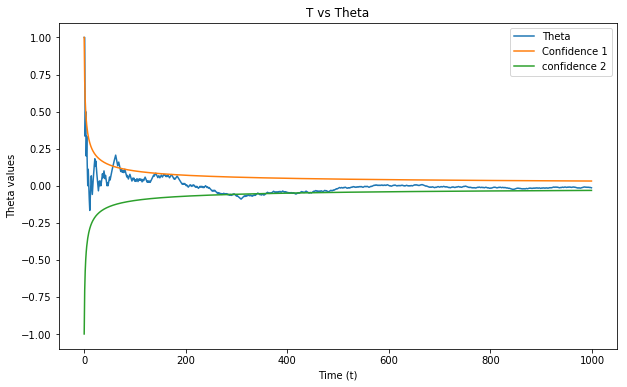

In [5]:
#this is the plot for noise
plt.figure(figsize = (10 , 6))
plt.plot (range(n) , theta , label = "Theta")
plt.plot (range(n) , confidence1 , label = 'Confidence 1')
plt.plot(range(n) , confidence2 , label = "confidence 2")
plt.xlabel("Time (t)")
plt.ylabel("Theta values")
plt.title("T vs Theta")
plt.legend()

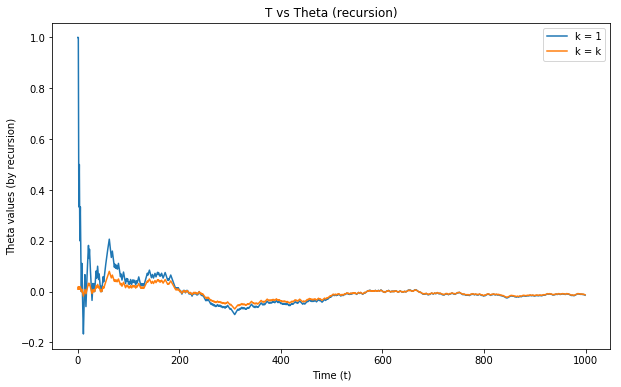

In [6]:
theta2 = []
theta3 = []
current_value = 0
current_value2 = 0
for i in range(1,n+1):
    current_value = current_value + (1/i) * (noise[i-1] - current_value)
    current_value2 = current_value2 + (1/(i+100)) * (noise[i-1] - current_value2)
    theta2.append(current_value)
    theta3.append(current_value2)

#plotting the graph
#this is the plot for noise
#it is the same as saying k samples with 0 noise
plt.figure(figsize = (10 , 6))
plt.plot (range(n) , theta2 , label = "k = 1")
plt.plot (range(n) , theta3 , label = "k = k")
plt.xlabel("Time (t)")
plt.ylabel("Theta values (by recursion)")
plt.title("T vs Theta (recursion)")
plt.legend()

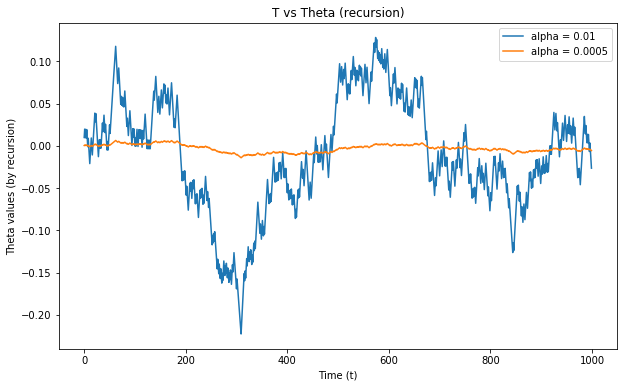

In [7]:
#recursion using the constant step size
#using the different value of alpha
theta2 = []
theta3 = []
current_value = 0
current_value2 = 0
alpha =0.01
alpha2 = 0.0005
for i in range(1,n+1):
    current_value = current_value + (alpha) * (noise[i-1] - current_value)
    current_value2 = current_value2 + (alpha2) * (noise[i-1] - current_value2)
    theta2.append(current_value)
    theta3.append(current_value2)

#plotting the graph
#this is the plot for noise
plt.figure(figsize = (10 , 6))
plt.plot (range(n) , theta2 , label = "alpha = " + str(alpha))
plt.plot (range(n) , theta3 , label = "alpha = " + str(alpha2))
plt.xlabel("Time (t)")
plt.ylabel("Theta values (by recursion)")
plt.title("T vs Theta (recursion)")
plt.legend()

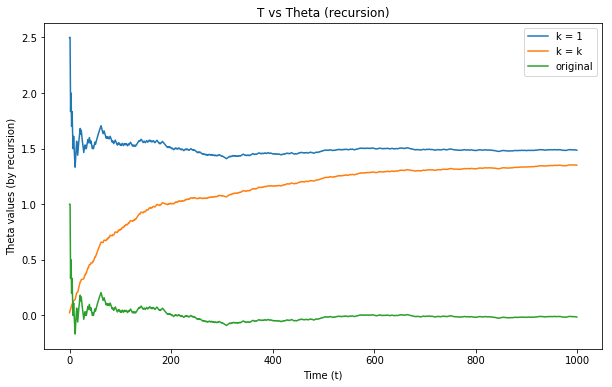

In [8]:
theta2 = []
theta3 = []
original = []
current_value = 0
current_value2 = 0
optimal = 1.5
for i in range(1,n+1):
    current_value = current_value + (1/i) * (optimal + noise[i-1] - current_value)
    current_value2 = current_value2 + (1/(i+100)) * (optimal+ noise[i-1] - current_value2)
    original.append(current_value - optimal)
    theta2.append(current_value)
    theta3.append(current_value2)

#plotting the graph
#this is the plot for noise
#it is the same as saying k samples with 0 noise
plt.figure(figsize = (10 , 6))
plt.plot (range(n) , theta2, label = "k = 1")
plt.plot (range(n) , theta3 , label = "k = k")
plt.plot (range(n) , original , label = "original")
plt.xlabel("Time (t)")
plt.ylabel("Theta values (by recursion)")
plt.title("T vs Theta (recursion)")
plt.legend()

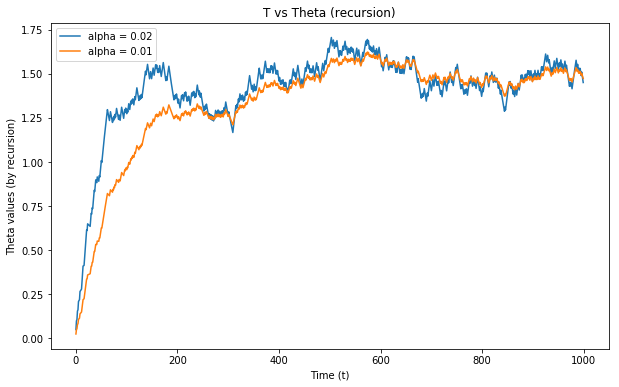

In [9]:
#recursion using the constant step size
#using the different value of alpha
theta2 = []
theta3 = []
current_value = 0
current_value2 = 0
alpha =0.02
alpha2 = 0.01
optimal = 1.5
for i in range(1,n+1):
    current_value = current_value + (alpha) * (optimal + noise[i-1] - current_value)
    current_value2 = current_value2 + (alpha2) * (optimal + noise[i-1] - current_value2)
    theta2.append(current_value)
    theta3.append(current_value2)

#plotting the graph
#this is the plot for noise
plt.figure(figsize = (10 , 6))
plt.plot (range(n) , theta2 , label = "alpha = " + str(alpha))
plt.plot (range(n) , theta3 , label = "alpha = " + str(alpha2))
plt.xlabel("Time (t)")
plt.ylabel("Theta values (by recursion)")
plt.title("T vs Theta (recursion)")
plt.legend()

In [10]:
#calculate the square of the second norm
def norm (optimal , theta):
    return np.sum((theta - optimal) ** 2) 

In [11]:
#this is to deal with the multidensional case
noise = np.zeros ((2 , n))
for i in range(n):
    if (random.random() > 0.5):
        noise[0][i] = 1
    else:
        noise[0][i] = -1
    
    if (random.random() > 0.5):
        noise[1][i] = 1
    else:
        noise[1][i] = -1
        
A = np.array([[1,0],[0,1]])


In [12]:
print (noise.shape)

(2, 1000)


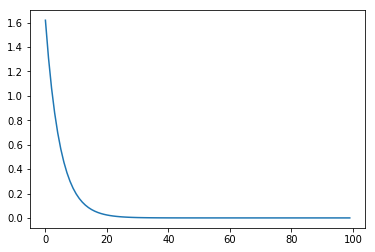

In [13]:
optimal = np.zeros((2 , 1))
current_value = np.ones ((2, 1))
b = np.copy (optimal)
alpha = 0.1
norm_array = []

for i in range(1 , 100+1):
    current_value = current_value + alpha * (b - current_value)
    norm_array.append(norm(current_value , optimal))
    
plt.plot (range(100) , norm_array)

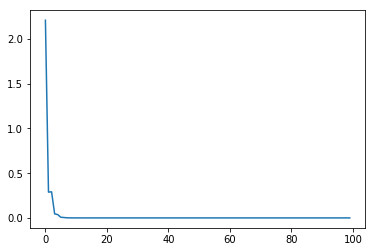

In [14]:
n = 100
optimal = np.zeros((2 , 1))
b = np.array([[0] , [0]])
A = np.array([[2,1] , [-1,1]])
alpha = 0.7
norm_array = []
current_value = np.ones ((2, 1))
alltheta = np.zeros((0 , 2))
for i in range(1 , n+1):
    current_value = current_value + alpha * (b - np.matmul(A , current_value) )
    norm_array.append(norm(current_value , optimal))
    alltheta = np.vstack((alltheta , np.transpose(np.matmul(A , current_value)) ))
    
plt.plot (range(n) , norm_array)


In [15]:
b

array([[0],
       [0]])

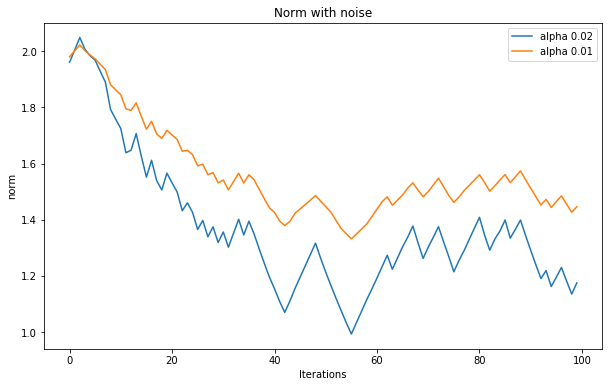

In [16]:
optimal = np.zeros((2 , 1))
b = np.array([[1] , [1]])
A = np.array([[2,1] , [-1,1]])



alpha1 = 0.02
alpha2= 0.01
norm_array = []
current_value = np.ones ((2, 1))

norm_array2 = []
current_value2 = np.ones ((2, 1))
alltheta = np.zeros((0 , 2))

for i in range(1 , n+1):
    current_value = current_value + alpha1 * (b - np.matmul(A , current_value) + noise[: , i-1].reshape((2,1)) )
    norm_array.append(norm(current_value , optimal))
    alltheta = np.vstack((alltheta , np.transpose(np.matmul(A , current_value)) ))
    current_value2 = current_value2 + alpha2 * (b - np.matmul(A , current_value2) + noise[: , i-1].reshape((2,1)) )
    norm_array2.append(norm(current_value2 , optimal))

        
    
plt.figure(figsize = (10 , 6))
plt.title("Norm with noise")
plt.plot (range(n) , norm_array , label = "alpha " + str(alpha1))
plt.plot (range(n) , norm_array2 , label = "alpha " + str(alpha2))
plt.xlabel ("Iterations")
plt.ylabel ("norm")
plt.legend()

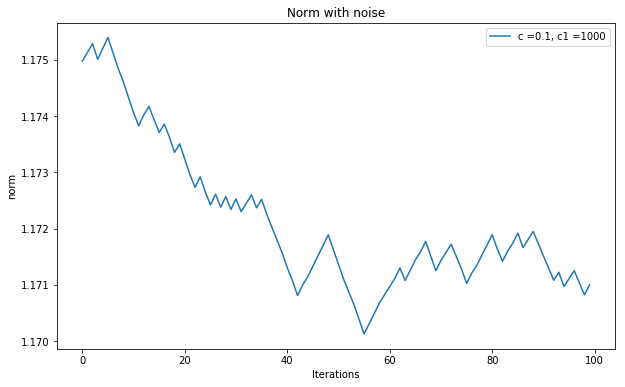

In [17]:
optimal = np.zeros((2 , 1))
b = np.array([[1] , [1]])
A = np.array([[2,1] , [-1,1]])



c= 0.1
c1 = 1000

alpha1 = c /(c1+1)
norm_array = []
urrent_value = np.ones ((2, 1))


for i in range(1 , n+1):
    current_value = current_value + alpha1 * (b - np.matmul(A , current_value) + noise[: , i-1].reshape((2,1)) )
    norm_array.append(norm(current_value , optimal))
    
    alpha1 = c/(c1 + i)
    
    
plt.figure(figsize = (10 , 6))
plt.title("Norm with noise")
plt.plot (range(n) , norm_array , label = "c =" + str(c) + ", c1 =" + str(c1))
#lt.plot (range(n) , norm_array2 , label = "alpha " + str(alpha2))
plt.xlabel ("Iterations")
plt.ylabel ("norm")
plt.legend()